In [1]:
import pandas as pd
import matplotlib.pyplot as plt


sp500 = pd.read_excel('Libro1.xlsx',sheet_name='ParaAlberto')

In [2]:
sp500 = sp500.iloc[0:500,0:2]
sp500.head()

,Days,100
0,1.0,98.591549
1,2.0,98.278560
2,3.0,104.851330
3,4.0,105.007825
4,5.0,105.320814


In [3]:
MA10 = []
MA45 = []
for i in range(45, len(sp500)):
    short = sp500.iloc[i-10:i,1].mean()
    MA10.append(short)
    long = sp500.iloc[i-45:i,1].mean()
    MA45.append(long)

In [4]:
MA45 = pd.DataFrame(MA45)
MA10 = pd.DataFrame(MA10)
dif = pd.DataFrame(MA10-MA45)

In [5]:
nsp = pd.DataFrame(sp500.iloc[45:,1])
nsp = nsp.reset_index(drop=True)
series = pd.concat([nsp,MA10,MA45,dif],axis=1)
series

,100,0,0,0
0,96.741640,100.076473,104.562290,-4.485817
1,97.842764,99.525911,104.521181,-4.995270
2,97.370854,99.415799,104.511497,-5.095698
3,99.258495,99.054001,104.345264,-5.291263
4,99.101192,98.912428,104.217501,-5.305074
...,...,...,...,...
450,123.255513,122.077065,117.224060,4.853005
451,123.619711,122.025036,117.366408,4.658628
452,123.957899,121.991217,117.450121,4.541096
453,124.712304,122.108281,117.719675,4.388606


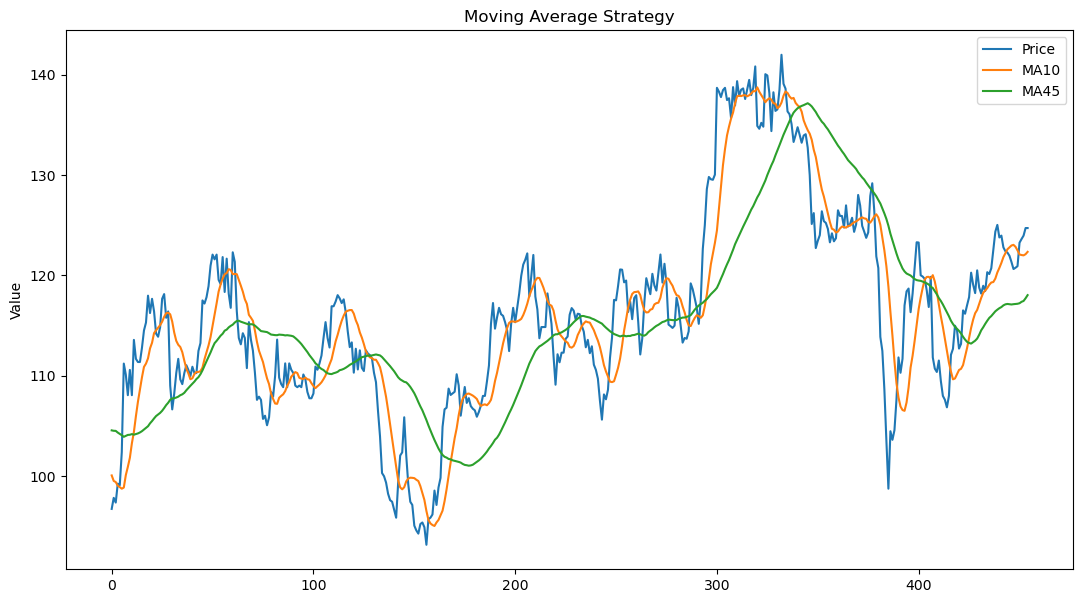

In [6]:
plt.figure(figsize=(13, 7))

# Graficar cada serie
plt.plot(series.index, series.iloc[:, 0], label='Price')
plt.plot(series.index, series.iloc[:, 1], label='MA10')
plt.plot(series.index, series.iloc[:, 2], label='MA45')

# Añadir etiquetas y título

plt.ylabel('Value')
plt.title('Moving Average Strategy')
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.show()

In [7]:
buy = 0
sell = -1
Signal = []
for i in range(0,len(dif)):
    if dif.iloc[i,0] > 0 and dif.iloc[i-1,0] < 0:
        buy +=1
        Signal.append(-1)
    elif dif.iloc[i,0] < 0 and dif.iloc[i-1,0] > 0:
        sell +=1
        Signal.append(1)
    else:
        Signal.append(0)
Total = buy + sell
print(f'The number of purchases: {buy}')
print(f'The number of sales: {sell}')
print(f'The total number of signals: {Total}')
Signal = pd.DataFrame(Signal)
Signal.iloc[-1] = 1

The number of purchases: 7
The number of sales: 6
The total number of signals: 13


In [8]:
Income = 0 
Cost = 0
a = 0
W = L = 0
position = []
series2 = pd.concat([nsp,Signal],axis=1)
print('Prices involved:\n')
for x in range(1,len(nsp)): 
    if series2.iloc[x,1] == -1:
        if a == 0:
            Cost = -nsp.iloc[x,0]+ Cost
            print(nsp.iloc[x,0])
            Position = -nsp.iloc[x,0]
            position.append(-nsp.iloc[x,0])
            a=1
        else:
            Cost = -nsp.iloc[x,0]*2 + Cost
            print(nsp.iloc[x,0])
            position.append(-nsp.iloc[x,0])
        
    elif series2.iloc[x,1] == 1:
        Income = nsp.iloc[x,0]*2+ Income
        print(nsp.iloc[x,0])
        position.append(nsp.iloc[x,0])
        
position = pd.DataFrame(position)
print('\n\nProfit and Loss:\n')
for s in range(1,len(position)):
    if position.iloc[s,0]+position.iloc[s-1,0] > 0:
        print(position.iloc[s,0]+position.iloc[s-1,0])
        W +=1
    else:
        L +=1
        print(position.iloc[s,0]+position.iloc[s-1,0])
    


Prices involved:

113.57311217261838
110.2871139219109
113.76321226947971
112.05696890548734
108.24766664915391
111.34362117058733
119.30594555818031
113.68702373619884
128.59384648905439
134.00584062973695
119.64555558954065
111.5173217141546
117.83352646284081
124.71230437743128


Profit and Loss:

-3.285998250707479
-3.476098347568808
-1.706243363992371
3.8093022563334245
3.0959545214334128
-7.962324387592986
-5.618921821981473
-14.906822752855547
5.411994140682566
14.360285040196302
-8.128233875386044
-6.316204748686204
6.878777914590472


In [9]:
print(f'Net income: {round(Cost+Income-nsp.iloc[-1,0],3)}\n')
print(f'Winning positions: {W}\n')
print(f'Losing positions: {L}')

Net income: -17.845

Winning positions: 5

Losing positions: 8
